In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath('/mnt/c/Users/demeter_turos/PycharmProjects/chrysalis')
if module_path not in sys.path:
    sys.path.append(module_path)

import chrysalis as ch


In [ ]:
data_path = '/mnt/f/Visium_hd/Visium_HD_Human_Colon_Cancer_square_016um_outputs/'

tissue_positions_df = pd.read_parquet(data_path + 'spatial/tissue_positions.parquet')
tissue_positions_df.to_csv(data_path + 'spatial/tissue_positions_list.csv', header=False, index=False)

adata = sc.read_visium(data_path)

ch.detect_svgs(adata, neighbors=8, top_svg=1000, min_morans=0.01)
adata.write_h5ad(data_path + '16um_svg.h5ad')


In [ ]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
ch.pca(adata, n_pcs=40)
ch.aa(adata, n_pcs=20, n_archetypes=15)
adata.write_h5ad(data_path + '16um_chr_15.h5ad')


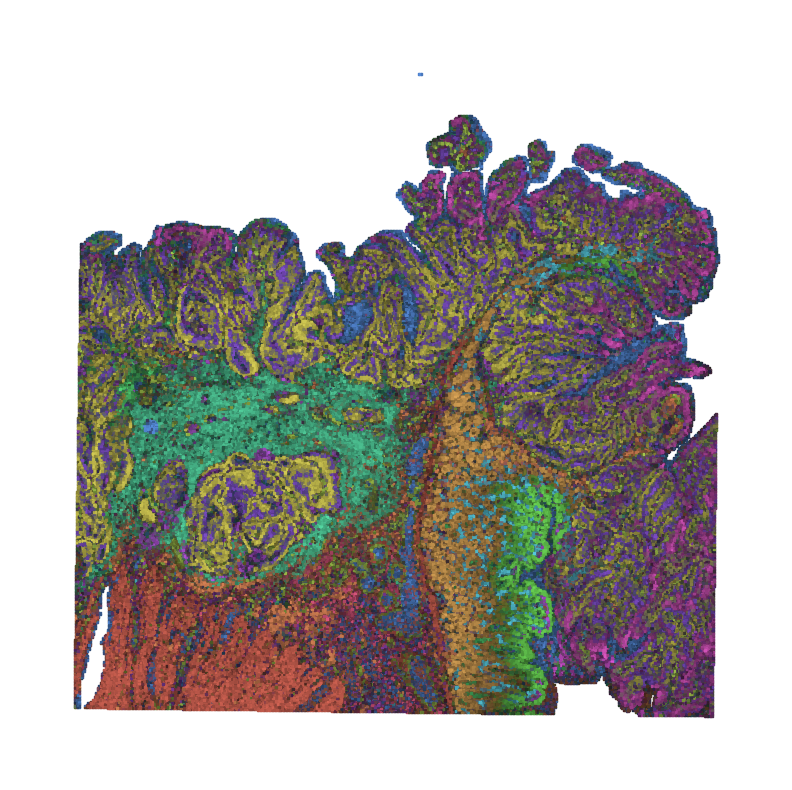

In [2]:
data_path = '/mnt/f/Visium_hd/Visium_HD_Human_Colon_Cancer_square_016um_outputs/'

adata = sc.read_h5ad(data_path + '16um_chr_15.h5ad')

ch.plot(adata, dim=15, marker='s', figsize=(10, 10), rasterized=True)
plt.show()


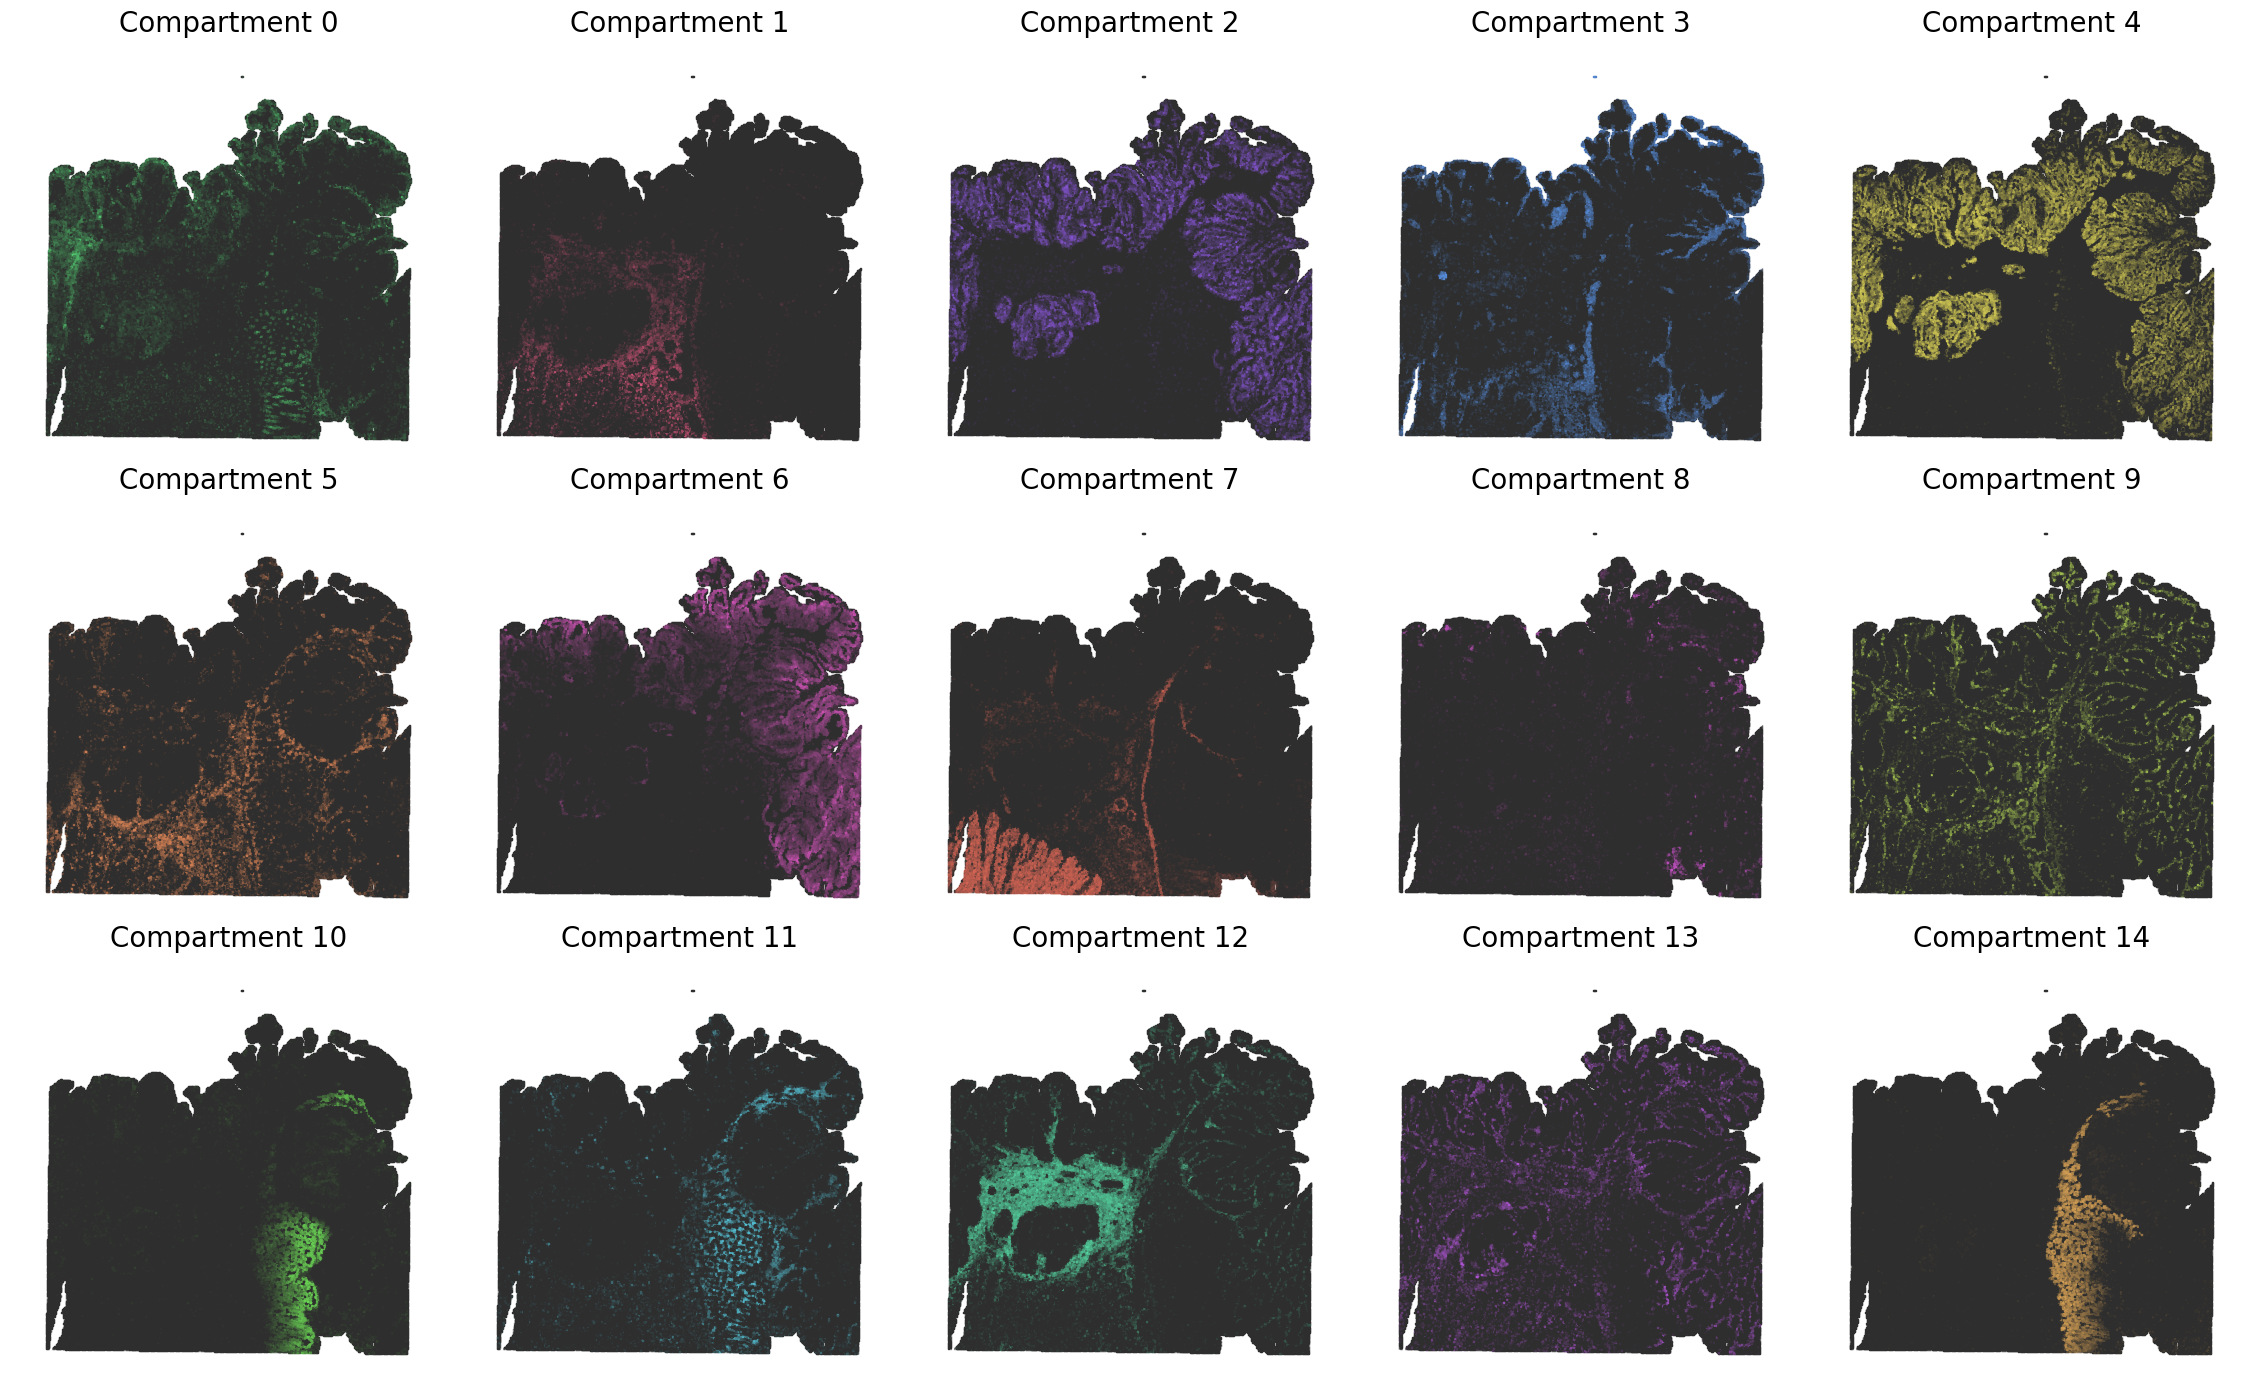

In [3]:
ch.plot_compartments(adata, marker='s', ncols=5, rasterized=True, size=5, title_size=20, rotation=0,
                     sample_id=None, spot_size=0.8, backend='scatter')
plt.show()


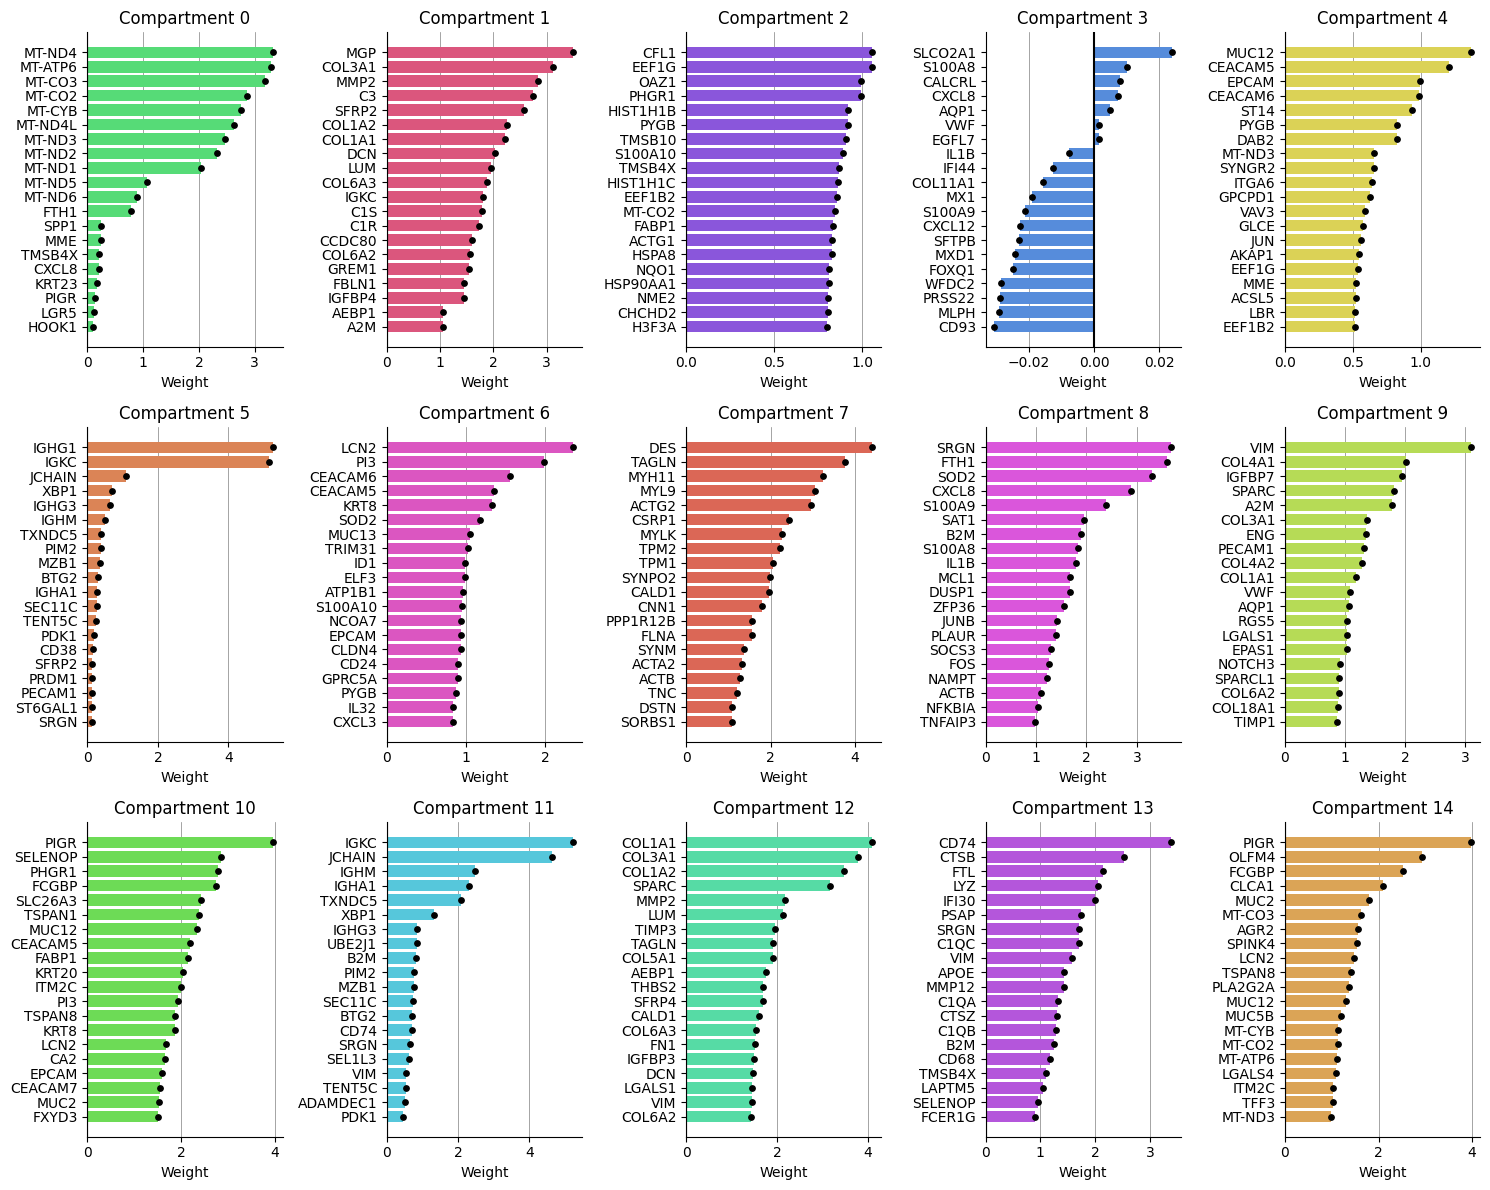

In [4]:
ch.plot_weights(adata, ncols=5)
plt.show()
